In [1]:
import numpy as np
import json
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch
import torchvision
from torchvision import models, transforms

In [3]:
torch.__version__

'1.2.0'

In [4]:
torchvision.__version__

'0.4.0'

In [5]:
net = models.vgg16(pretrained=True)
net.eval()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/koichiro_mori/.cache/torch/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:49<00:00, 11.3MB/s] 


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [6]:
class BaseTransform():

    def __init__(self, resize, mean, std):
        self.base_transform = transforms.Compose([
            transforms.Resize(resize),
            transforms.CenterCrop(resize),
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ])
    
    def __call__(self, img):
        return self.base_transform(img)

In [7]:
image_file_path = './data/goldenretriever-3724972_640.jpg'

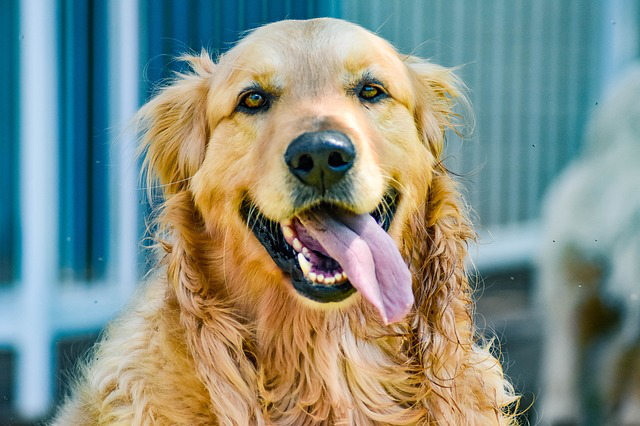

In [11]:
img = Image.open(image_file_path)
img

In [24]:
resize = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
transform = BaseTransform(resize, mean, std)
img_transformed = transform(img)

In [25]:
img_transformed.shape

torch.Size([3, 224, 224])

In [26]:
img_transformed = img_transformed.numpy().transpose((1, 2, 0))
img_transformed.shape

(224, 224, 3)

In [27]:
np.min(img_transformed), np.max(img_transformed)

(-2.117904, 2.465708)

In [29]:
img_transformed = np.clip(img_transformed, 0, 1)

In [30]:
np.min(img_transformed), np.max(img_transformed)

(0.0, 1.0)

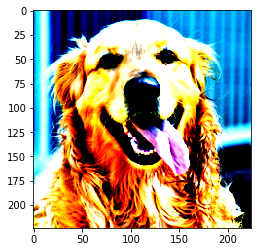

In [31]:
plt.imshow(img_transformed)
plt.show()

In [34]:
!wget https://raw.githubusercontent.com/raghakot/keras-vis/master/resources/imagenet_class_index.json

--2019-10-03 08:34:21--  https://raw.githubusercontent.com/raghakot/keras-vis/master/resources/imagenet_class_index.json
raw.githubusercontent.com (raw.githubusercontent.com) をDNSに問いあわせています... 151.101.192.133, 151.101.128.133, 151.101.64.133, ...
raw.githubusercontent.com (raw.githubusercontent.com)|151.101.192.133|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 35363 (35K) [text/plain]
`imagenet_class_index.json' に保存中

imagenet_class_inde 100%[===================>]  34.53K  --.-KB/s    時間 0.004s  

2019-10-03 08:34:22 (7.86 MB/s) - `imagenet_class_index.json' へ保存完了 [35363/35363]



In [42]:
ILSVRC_class_index = json.load(open('./data/imagenet_class_index.json', 'r'))
ILSVRC_class_index['0']

['n01440764', 'tench']

In [43]:
class ILSVRCPredictor():
    
    def __init__(self, class_index):
        self.class_index = class_index
    
    def predict_max(self, out):
        maxid = np.argmax(out.detach().numpy())
        predicted_label_name = self.class_index[str(maxid)][1]
        return predicted_label_name

In [44]:
predictor = ILSVRCPredictor(ILSVRC_class_index)

In [52]:
image_file_path = './data/goldenretriever-3724972_640.jpg'
img = Image.open(image_file_path)

transform = BaseTransform(resize, mean, std)
img_transformed = transform(img)
inputs = img_transformed.unsqueeze(0)

In [64]:
inputs.shape

torch.Size([1, 3, 224, 224])

In [65]:
out = net(inputs)

In [66]:
out.shape

torch.Size([1, 1000])

In [68]:
result = predictor.predict_max(out)

In [69]:
result

'golden_retriever'